In [2]:
import numpy as np 
import matplotlib.pyplot as plt 



# 회귀분석

회귀 분석은 데이터간의 상관관계 모형을 구해서 데이터를 해석하거나 예측하는 기법을 의미한다. 
간단한 예로는 들어 다음과 같은 데이터를 통과하는 직선을 찾는 기법이 있다. 

    a = np.array([1,3,5,7,9])

<img src = "https://raw.githubusercontent.com/decoz/mlclass/master/images/f2_1.png" align = left>


물론 점들이 정확히 직선에 위치되어있다면 이는 매우 쉬운 문제일 것이다. 하지만 실제 데이터는 노이즈를 포함하여 복잡한 형태를 띄고 있기 때문에 이러한 데이터의 경향성을 파악하는 것은 결코 쉬운 일이 아니다.  

다음과 같은 데이터를 생각해보자 

    b = a + np.random.normal(0,1,5)

<img src = "https://github.com/decoz/mlclass/blob/master/images/f2_2.png?raw=true" align = left>


위의 데이터에 정규분포 평균0, 편차1의 노이즈를 포함한 데이터를 포함한 경우이다.  위에서 다룬 직선은 분명 이번 데이터의 경향성도 어느정도 잘 다루고 있다. 하지만 이것이 얼마나 잘 표현한다고 볼 수 있는가? 

위의 경우는 직선을 통해 표현된 모델과 실제 데이터의 오차를 통해 측정한다. 
특히 이와 같이 데이터간의 상관관계를 연속된 선형관계로 해석하는 기법을 선형회귀분석이라고 한다.  


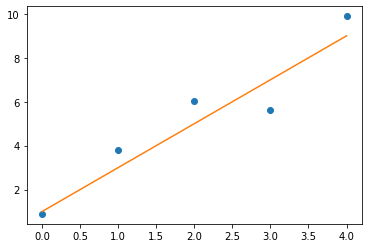

In [3]:
a = np.array([1,3,5,7,9])
b = a + np.random.normal(0,1,5)
plt.plot(b,'o')
plt.plot(a)
plt.show()


<br><hr style="height:3px">
<br>

# 선형 회귀분석의 기초 


앞선 예제의 경우는 가장 오차가 적은 직선을 찾은 경우로서 이러한 직선은 x 의 1차항만을 ( x 제곱 이상은 무시  ) 
포함한 모델을 의미한다. (2차항이 끼면 구부러지기 시작 ) 이러한 경우를 선형 단순 회귀분석이라 칭한다. 

먼저 회귀분석을 위한 가장 단순한 형태의 데이터를 생성해보자 



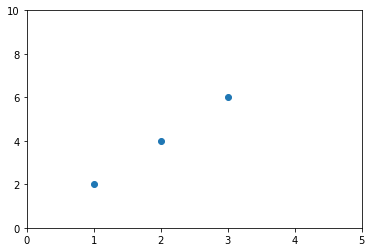

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1,2,3])
y = np.array([2,4,6])
plt.ylim(0,10)
plt.xlim(0,5)
plt.plot(x,y,'o')
plt.show()


이는 y = x * 2 의 가장 단순한 형태의 데이터 배치이며이때 오차를 최소화하는 직선 모델은 y = x * 2 이다. 이를 얻기 위해서 여기서는 sklearn 라이브러리의 linear_model 을 사용하도록 하겠다. 

## sklearn.linear_model 사용법


In [5]:
from sklearn import linear_model #모델회귀분석
regr = linear_model.LinearRegression()

위의 모델은 regr 은 선형 회귀분석을 수행할 수 있는 객체이며 fit 이라는 메소드를 통해 회귀분석을 수행한다. 그러면 이를 수행해보자 

In [6]:
regr.fit(x,y)

ValueError: Expected 2D array, got 1D array instead:
array=[1 2 3].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

아마 기나긴 에러를 보고 당황했을 것이다.  
회귀분석에서 x 는 하나이상의 변수를 가정한다. 변수가 하나인 [1,2,3] 이라면 이 형태로도 괜찮겠지만 [3,4,5] 가 포함될 경우 [[1,2], [2,4], [3,5]] 이런 식으로 입력되는 경우를 가정해서 설계되어있다. 

그러므로 [1,2.3] 이 아니라 

    [[1],
     [2],
     [3]] 
 
의 형태가 되어야 하며 이는 (1,3) 의 배열을 (3,1) 로 바꾸어주어야만 함을 의미한다. 이 경우 reshape 를 사용하면 쉽게 변환이 가능하다. 



In [ ]:
regr.fit(x.reshape(3,1),y) # x는 원래 [1,2,3](3,)->[[3],[2],[1]](3,1)

이제 regr.coef_ 값을 통해 상관 계수 2를 추출할 수 있다.

## coef_ : 상관계수
기울기를의미

In [ ]:
print(regr.coef_)

이를 그래프로 표현하면 다음과 같다. 

AttributeError: 'LinearRegression' object has no attribute 'coef_'

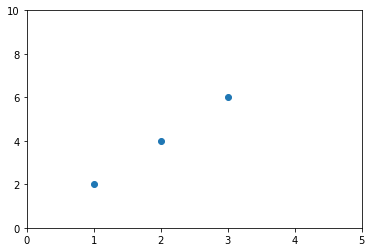

In [7]:
plt.ylim(0,10) #한계선 
plt.xlim(0,5)
plt.plot(x,y, 'o') # 점
plt.plot(x, x * regr.coef_) # 선, x,y라고 생각하기 위에서 상관계수가 2이므로 

### <font color = 'red'> 연습 : 회귀분석 직접 해보기 
다음의 x, y 에 대해 회귀분석을 한 후에 그래프로 출력해보자. 
</font>

```
x = np.array([1,2,3,4])
y = np.array([1.5, 3, 4.5, 6])
```

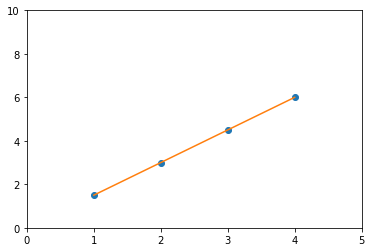
    

[1.5]


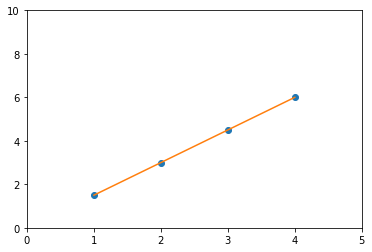

In [8]:
x = np.array([1,2,3,4])
y = np.array([1.5, 3, 4.5, 6])
# 연습문제의 코드를 작성하세요
plt.ylim(0,10)
plt.xlim(0,5)
regr.fit(x.reshape(4,1), y) #한줄선으로 합쳐지지않음 ㄴ 형태로 reshape한다고생각
plt.plot(x,y, 'o') # 점, 실제 데이터
plt.plot(x, x * regr.coef_) # 선형 단순? 회귀분석, 데이터간 상관관계를 연속된 선형관계로 해석
'''
[[1, 1.5],
 [2, 3],
 [3, 4.5],
 [4, 6]]
 '''
print(regr.coef_)

## intercept_ : 상수항

이번엔 다음과 같은 데이터를 보자 

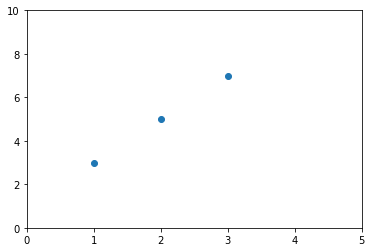

In [ ]:
x = np.array([1,2,3])
y = np.array([3,5,7])
plt.ylim(0,10)
plt.xlim(0,5)
plt.plot(x,y,'o')

plt.show()

위의 데이터를 앞의 예제와 같이 처리하면 다음과 같은 결과가 나온다. 

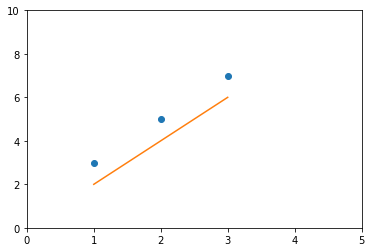

In [ ]:
x = np.array([1,2,3])
y = np.array([3,5,7])
regr.fit(x.reshape(3,1), y)
plt.ylim(0,10)
plt.xlim(0,5)
plt.plot(x, y, 'o')
plt.plot(x, x * regr.coef_)

앞의 예제와 같이 기울기 .. 즉 상관계수는 2 지만 3,5,7 은 여기에 다시 1을 더해준 값이다. 요컨데 두 값의 관계는 다음과 같다.

    y = x * 2 + 1 
 
2 라는 x 의 1차항 계수에 추가로 1이라는 상수항을 지닌 식이다. 이 상수항의 값은 
```
  regr.intercept_
```
으로 저장된다. 

In [ ]:
print(regr.intercept_)

1.0000000000000009


### <font color = 'red'> 연습 : 상수항을 포함 그래프 그리기
    
위의 x,y 에 대해 regr.coef_ 와 regr.interceipt_ 까지 포함해 다음과 같은 직선을 그려보자.
</font>



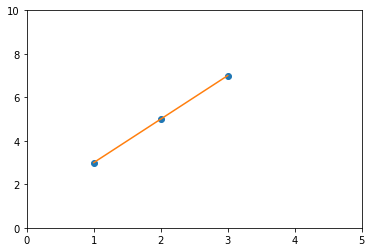


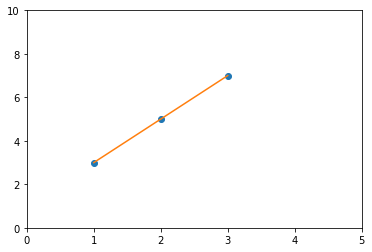

In [ ]:
x = np.array([1,2,3])
y = np.array([3,5,7])
regr.fit(x.reshape(3,1), y)

# 연습문제의 코드를 작성하세요
plt.ylim(0,10)
plt.xlim(0,5)
plt.plot(x, y, 'o')
plt.plot(x, x * regr.coef_ + regr.intercept_)


## score : 결정계수

이번엔 노이즈를 포함한 3 * x + 2 데이터 50개를 생성해서 선형 단순회귀분석을 수행해보자 
노이즈는 편차 5의 정규분포로 생성한다. 

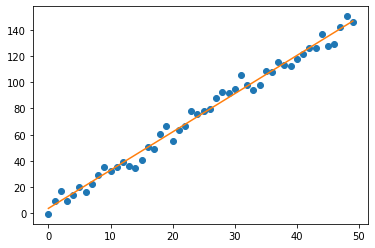

0.9877864803927363


In [ ]:
n = 50
x = np.arange(0,n,1) #1차원을 말하는듯 
y = x * 3 + 2 + np.random.normal(0,5,n)
plt.plot(x,y, 'o')
regr.fit(x.reshape(n,1),y)
plt.plot(x, x * regr.coef_ + regr.intercept_)
plt.show()
print(regr.score(x.reshape(n,1),y))



위에서 회귀분석으로 생성된 모델은 최적화된 직선을 만든다. 그러나 과연 이 직선이 이 데이터를 표현하는데 충분한 모델일까?  위처럼 눈으로 분명히 보인다면 문제가 없지만 3,4차원의 복잡한 데이터는 이렇게 시각화 시키기가 어렵다. 그래서  생성된 회귀모델이 얼마나 데이터를 잘 표현하는지지를 알기 위해서는 직선과 실제 데이터의 오차값의 비율을 측정함으로서 이를 확인할 수 있다. 이러한 수치를 결정계수라고 하며 다음과 같이 계산한다. 

```
    - ( Y 오차 / Y 편차 ) ^ 2 
```

Y 오차는 실제 데이터와 모델의 데이터와의 차이값이고 편차는 Y 평균과 Y값의 차이값을 의미한다.. 편차값으로 나누는 이유는 데이터의 규모를 반영하기 위함이다. 다음과 같은 두 경우를 생각해보자 

- y값이 평균 1억단위의 편차가 있는데 평균 1000 정도의 오차로 예측
- y값이 평균 1000 단위의 편차가 있는데 평균 500 정도의 오차로 예측     


이 두 경우 전자의 경우가 평균오차가 크지만 데이터의 크기와 평균 편차를 생각하면 오히려 후자쪽의 모델보다 이쪽이 더 정확한 모델임을 알 수 있다. 그러므로 편차값을 나눠줌으로서 데이터유 규모를 반영해서 모델의 정확도를 평가하기 위함이다. 

물론 수동으로 이를 작성할 수도 있겠지만 regr 은 자체적으로 이런 메소드를 지원한다.

```
score( x, y ) 
```

x 는 x 데이터와 y 데이터이며 반드시 회귀분석을 수행하던 데이터와 일치하지 안아도 된다. 즉 테스트용 데이터를 따로 측정할 수도 있다. (왜 그것이 필요한지는 나중에 기회가 되면 언급하겠다) 

위의 모델의 적합도 즉, 결정계수를 알기 위해서는 다음과 같이 출력하면 된다. 

In [ ]:
print( regr.score(x.reshape(n,1), y ))

### <font color = 'red'> 연습 : 결정계수 구하기 
다음 데이터를 회귀분석하고 결정계수를 구해보세요
</font>
    

0.9489931659336039


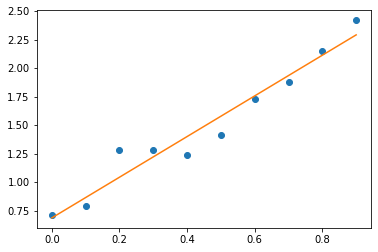

In [ ]:
x = np.array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
y = np.array([0.71, 0.79, 1.28, 1.28, 1.24, 1.41, 1.73, 1.88, 2.15, 2.42])

# 연습문제의 코드를 작성하세요
plt.plot(x, y, 'o')
regr.fit(x.reshape(-1, 1), y)
#먼저 학습한뒤 plot
plt.plot(x, x*regr.coef_+regr.intercept_)




print(regr.score(x.reshape(-1,1),y))

<br>

<hr>

<br>

# 다중 회귀분석

위의 회귀 분석은 x -> y 의 직선의 선형관계에 대한 회귀 분석이다. 하지만 만일 변수가 2차원 데이터라면 어떨까?  예를 들어 다음의 데이터를 보자. 
```
x1 = [1,2,3,4]
x2 = [2,2,4,1]
y = [ 4, 6, 10, 9 ] 
```

이 데이터는 

```
y = 2 * x1 + x2 
```

이 관계를 이루고 있으며 두개의 상관계수 2, 1 로 이뤄진 관계이다. 

변수가 하나 늘어난 것만으로도 이를 한눈에 풀기는 상당히 어려워지며 여기에 상수까지 추가될 경우 직관적으로 관계를 알아채기는 쉽지 안다. 

하지만 결국 위의 문제는 데이터의 차원이 증가했을 뿐 각각의 변수값이 각각의 계수와 1차원적으로 결합된 형태이며 이는 기존의 회귀분석으로 충분히 해결이 가능하다. 




## 다중 변수 입력값 생성

회귀분석 라이브러리는 기본적으로 다중회귀분석을 지원하도록 설계되어 있으며 이 때문에 변수 값이 하나라도 항상 이를 배열속에 넣어서 입력하도록 요구한다. 변수가 하나인 회귀분석에서는 이 때문에
```
x1 = [1,2,3] 

x: 
[[1]
 [2]
 [3]]
```

형태로 reshape 하여 사용했다.  값이 하나 이상인 경우는 다음과 같이 구성한다. 

```
x1 = [1,2,3,4]
x2 = [2,2,4,1]

x : 
[[1 2]
 [2 2]
 [3 4]
 [4 1]]
``` 

이는 conatenate 나 c_ 를 사용하면 간단하게 해결이 된다. 먼저 데이터 x1 과 x2 를 하나의 배열로 묶어주도록 한다. 



In [ ]:
x1 = np.array([1,2,3,4])
x2 = np.array([2,2,4,1])
x = np.c_[x1, x2]
print(x)

[[1 2]
 [2 2]
 [3 4]
 [4 1]]


이제 y 값을 추가해서 회귀분석을 실행해보도록 하겠다. 이미 x 의 값은 2차원화 되어 있으므로 따로 reshape를 할 필요가 없다. 

In [ ]:
y = np.array( [ 4, 6, 10, 9 ] )
regr.fit(x,y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

아무 에러 회귀분석이 수행된 걸 볼 수 있다. 이를 찍어보면 계수값 (coef_) 은 해당 입력에 대한 각각의 계수 2와 1의 를 배열로 갖고 있다. 

In [ ]:
print("coef:", regr.coef_ )
'''
상관계수가 2,1이므로 
[[1 2] -> 1*2 + 2*1 = 4
 [2 2] -> 2*2 + 2*1 = 6
 [3 4] -> 3*2 + 4*1 = 10
 [4 1]] -> 4*2 + 1*1 = 9
'''

coef: [2. 1.]


## 회귀 분석 결과를 이용해 y값 유추

coef_ 값은 
문제는 그래프로 쉽게 표현되던 x->y 의 관계에 비해 x1,x2 -> y 의 관계는 이를 시각화 시키기가 쉽지 안다.  하지만 x 입력에 coef 를 곱한 후에 더해줌 으로서 유추된 상관계수를 사용한 결과값과 실제 y값을 비교해 볼 수 있다. 

이를 위해 먼저 x 와 coef 를 곱해준다. 

In [ ]:
y_ = regr.coef_ * x 
print(y_)
'''
상관계수가 2,1이므로 
[[1 2] -> 1*2(2) + 2*1(2) = 4
 [2 2] -> 2*2(4) + 2*1(2) = 6
 [3 4] -> 3*2(6) + 4*1(4) = 10
 [4 1]] -> 4*2(8) + 1*1(1) = 9
'''

[[2. 2.]
 [4. 2.]
 [6. 4.]
 [8. 1.]]


이 결과 [ x1 * 2, x2 * 1 ] 들의 배열이 구성된다. 이제 좌측과 우측의 값을 더하면 된다. 이때 np.sum 을 사용하도록 하겠다. 

np.sum 은 각 축별로 합산값을 구해준다. 
```
## np.sum 사용법 

  data = np.array([[1,2], [3,4]])

  np.sum(data, axis = 0 ) 
  -> [4,6] 

  np.sum(data, axis = 1 ) 
  -> [3, 7] 
```

이제 np.sum 을 이용해 위의 x 를 가로축으로 합산해주면 다음과 같다. 


In [ ]:
print( np.sum(y_, axis = 1) )

[ 4.  6. 10.  9.]


이것은 결국 x1 * 2 + x2 * 1 의 값이 되어 y 값과 같아짐을 알 수 있다. 스코어 역시 바로 x, y를 대입해서 얻을 수 있다. 











In [ ]:
print(regr.score(x,y))

1.0


오차가 없는 선형 데이터 이므로 결정계수가 1가 출력된다. 

### <font color = 'red'> 연습 : 다중 회귀 분석 

다음을 데이터를 회귀 분석해서 계수값과 상수값, 결정계수를 구하세요
</font>



```
# 코드로 형식 지정됨
```




In [ ]:
x1 = np.array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
x2 = np.array([0.9, 0.7, 0.2, 0.9, 0.6, 0. , 0.1, 0.6, 0.9, 0.7])
y = np.array([0.69, 0.85, 0.48, 0.75, 0.68, 0.59, 0.65, 0.87, 1.06, 1.16])

# 위의 데이터를 회귀분석 해서 게수, 상수, 결정계수를 출력하세요 

x = np.c_[x1, x2]
regr.fit(x, y)
print("coef(계수): ", regr.coef_)
print("intercept(상수): ", regr.intercept_)
print("score(결정계수): ", regr.score(x, y))

#x = np.c_[x1, x2]
#print("coef: ", regr.coef_, "intercept: ", regr.intercept_)
#print("score: ", regr.score(x,y)


coef(계수):  [0.47449323 0.40652732]
intercept(상수):  0.33682274638019616
score(결정계수):  0.8328502880962914


## 2차원 시각화 

x1,x2 -> y 를 도표화 시키기는 쉽지 안지만 (3차원 그래프를 사용해야 가능) 이미지로 표현은 가능하다.  

다음과 같은 관계를 갖는 x1, x2 와 y를 생각해보자. 
```
y = x1 + x2 
```

이때 다음은 100개의 0~9까지의 x1 과 x2 의 조합을 만들어 더해준다. 


In [ ]:
x1, x2 = np.ogrid[:10, :10]
print(x1 + x2)



[[ 0  1  2  3  4  5  6  7  8  9]
 [ 1  2  3  4  5  6  7  8  9 10]
 [ 2  3  4  5  6  7  8  9 10 11]
 [ 3  4  5  6  7  8  9 10 11 12]
 [ 4  5  6  7  8  9 10 11 12 13]
 [ 5  6  7  8  9 10 11 12 13 14]
 [ 6  7  8  9 10 11 12 13 14 15]
 [ 7  8  9 10 11 12 13 14 15 16]
 [ 8  9 10 11 12 13 14 15 16 17]
 [ 9 10 11 12 13 14 15 16 17 18]]


좌측 상단은 x1,x2 가 0,0 이므로 0 + 0 이며 제일 우측 하단은 9 + 9 로 18이 들어간다.  이를 이미지화 시키면 다음과 같다. 



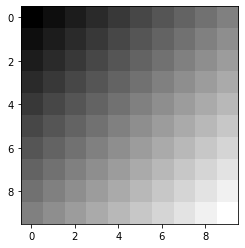

In [ ]:
plt.imshow(x1 + x2, cmap = 'gray')

이 원리를 이용하여 위에서 다뤘던 
```
x1 = [1,2,3,4]
x2 = [2,2,4,1]
y = [ 4, 6, 10, 9 ] 
```

을 회귀분석한 결과인 
```
coef: [2. 1.]
```
를 다음과 같이 시각화 시킬 수 있다. 

[[ 0  1  2  3  4  5  6  7  8  9]
 [ 2  3  4  5  6  7  8  9 10 11]
 [ 4  5  6  7  8  9 10 11 12 13]
 [ 6  7  8  9 10 11 12 13 14 15]
 [ 8  9 10 11 12 13 14 15 16 17]
 [10 11 12 13 14 15 16 17 18 19]
 [12 13 14 15 16 17 18 19 20 21]
 [14 15 16 17 18 19 20 21 22 23]
 [16 17 18 19 20 21 22 23 24 25]
 [18 19 20 21 22 23 24 25 26 27]]


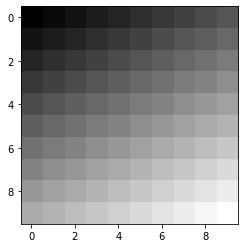

In [ ]:
x1,x2 = np.ogrid[:10, :10]
#print(x1 * 2 + x2 )
plt.imshow( x1 * 2 + x2 , cmap = 'gray')

결과적으로 다음 코드는 회귀분석의 결과를 흑백 이미지로 시각화 시켜준다. 

```
x1,x2 = np.ogrid[:10, :10]
c = regr.coef_
plt.imshow( x1 * c[0] + x2 * c[1] + regr.intercept_ , cmap = 'gray)
```

### <font color = 'red'> 연습 :  회귀분석 이미지화
다음 데이터를 회귀분석후 시각화시켜보자. 
</font>


[ 4. -3.]


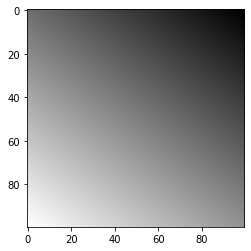

In [ ]:
x1 = np.array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
x2 = np.array([0.9, 0.7, 0.2, 0.9, 0.6, 0. , 0.1, 0.6, 0.9, 0.7])
y = np.array([ 7.3,  8.3, 10.2,  8.5,  9.8, 12. , 12.1, 11. , 10.5, 11.5])

# 입력 x1, x2 에 대해 y를 회귀 분석 한 후에 이미지로 시각화 시켜보자 
x = np.c_[x1, x2]
regr.fit(x, y)
c = regr.coef_
#print(c) #[ 4. -3.]
xx, yy = np.ogrid[:100, :100]
img = xx * c[0] + yy * c[1] + regr.intercept_

plt.imshow(img, cmap='gray')




<br>
<hr style="height:5px"><br>


#  다항 회귀분석

단순 회귀 분석은 모든 데이터의 연관성을 직선식으로 가정한다. 대부분의 비례관계가 대부분 직선적 성향을 띄는 것도 사실이지만 데이터의 제곱에 비례해 증가하는 곡선형태의 상관관계를 갖는 경우도 있다.  다항회귀분석은 다항식처럼 x 의 2차원 이상의 계수를 도출 하는 방법이다.  




## 2차항 회귀분석

다음은 -30 부터 30 사이의 100개의 x 에 대해 2차원 식
```
y = 5 * x ** 2 (x제곱
```
의 연관성을 갖는 y 값을 그래프로 그려준다.


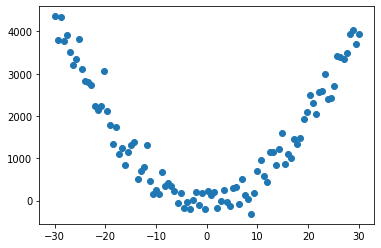

In [ ]:
n = 100
x = np.linspace(-30,30,n)
y = x ** 2 * 5 + np.random.normal(0,300,n) # 0기준 300편차 n개
plt.plot(x,y, 'o')
plt.show()

이를 기존의 방식으로 단순 1차원 항만 가진 회귀분석으로 구할경우 거의 예측이 불가능한 모델을 얻게된다. 

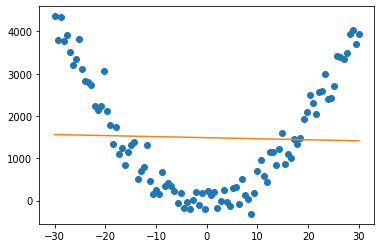

R2: 0.001021958973578041


In [ ]:
regr.fit( x.reshape(-1,1), y ) 
plt.plot(x, y, 'o')
plt.plot(x, x * regr.coef_ + regr.intercept_ )
plt.show()
print( "R2:", regr.score( x.reshape(-1,1), y))

결정계수가 0.001 도 안되는 처참한 모델이 탄생한다. 이는 1차식으로는 적합한 모델을 표현할 수는 없음을 의미한다. 

하지만 여기에 x 대신 x의 제곱이 담긴 데이터를 입력하면 어떻게 될까? 

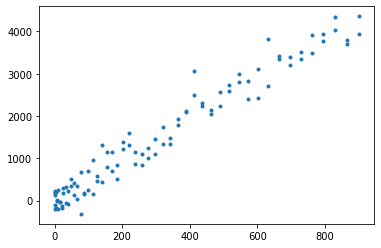

In [ ]:
x2 = x ** 2
plt.plot( x2, y, '.')

둘의 관계가 직선에 가깝게 바뀐것을 볼 수 있을것이다.  이는 위의 식을
```
x2 = x ** 2
y = x2 * 5 
```
로 변환 했기 때문에 y 와 x2 의 1차항 문제로 변환되었기 때문이다. 
이제 이것을 회귀 분석 하면 다음과 같다. 


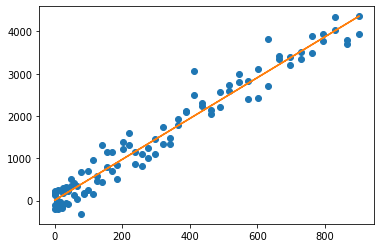

In [ ]:
regr.fit( x2.reshape(-1,1), y )
plt.plot(x2, y, 'o')
plt.plot(x2, x2 * regr.coef_ + regr.intercept_ )
plt.show() 
#print(regr.score( x2.reshape(-1,1), y ))

이제 y 이것을 x 에 대해서 그리면 다음과 같이 그려진다. 

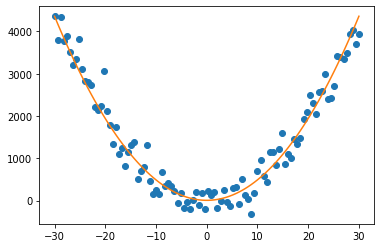

In [ ]:
regr.fit( x2.reshape(-1,1), y )
plt.plot(x, y, 'o')
plt.plot(x, x**2 * regr.coef_ + regr.intercept_ )
plt.show() 


위의 문제는 단지 x 를 x ** 2 로 변환해서 1차항 문제로 변환시킨 사례이다.  결정계수를 얻을 때에도 마찬가지로 x2나 x**2 를 넣어줘야한다.

In [ ]:
print( regr.score(x2.reshape(-1,1), y))

0.9556129887495449


위의 예제에선 상수항이 0 이었지만 상수항 존재하는 경우라도 2차항만으로 이뤄진 곡선을 회귀분석 가능하다. 


### <font color = 'red'> 연습 : 단순 2차항 분석

아래의 데이터 역시 ? * x **2 + ? 의 구조로 구성된 데이터이다. 직접 한번 회귀분석을 하고 결과를 그려보자 
</font>

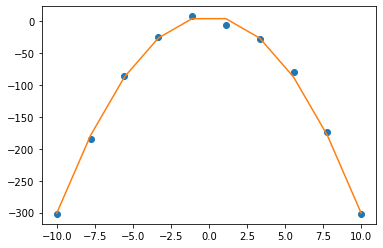

In [ ]:
x = np.linspace(-10,10,10) 
y = np.array([-301.875, -184.532,  -86.197,  -24.92 ,    8.202,   -5.793,
        -26.955,  -79.049, -173.654, -302.172])
plt.plot(x,y,'o')
#plt.show() 

# 위의 데이터를 2차원 항으로 회귀분석 해보세요
x2= x**2
regr.fit(x2.reshape(-1, 1), y)
plt.plot(x, x2*regr.coef_ + regr.intercept_)

plt.show() 


<br><br><br><br>
이제 1차항과 2차항이 섞인 다음과 같은 경우를 생각해보자. 

$y = 5x^2 - 10x + 4$


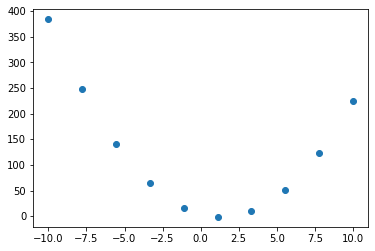

In [ ]:
x = np.linspace(-10,10,10) 
y = 3 * x ** 2 - 8 * x + 4
#y = 5 * x ** 2 - 10 * x + 4
plt.plot(x,y,'o')
plt.show()

위의 데이터는 2차항만으로 분석할 경우 정확한 결정계수를 얻을 수 없다. 


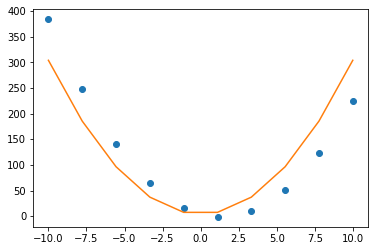

0.8163265306122449


In [ ]:
x2 = x**2
regr.fit(x2.reshape(-1,1), y)
plt.plot(x,y,'o')
plt.plot(x, x2 * regr.coef_ + regr.intercept_ )
plt.show()
print( regr.score(x2.reshape(-1,1), y))

이 경우는 x 와 x2 를 서로 다른 변수처럼 취급해서 다항회귀 분석을 함으로서 문제를 해결할 수 있다. 

In [ ]:
x1 = x 
x2 = x**2 
x = np.c_[x2,x1]
regr.fit(x,y)
print("coef:", regr.coef_, " intercept:", regr.intercept_)
print("score:",regr.score(x,y))


coef: [ 3. -8.]  intercept: 3.999999999999943
score: 1.0


오차를 넣지 안았기 때문에 다중 회귀 분석을 이용하면 정확한 2차항, 1차항 계수인 3, -8 과 상수항 4를 얻어 결정계수 1.0 을 얻게된다. 

이 결과를 도식화 하려면 2차항과 같이 각 항에 각 계수를 곱해 x 에 대한 예측 y값을 구해야 한다. 

```
regr.coef_[0] * x1 ** 2 + regr.coef_[1] * x1 + regr.intercept_
```
하지만 이미 x 가 [x1**2, x1] 형태로 값이 들어있으므로 간단히 
```
np.sum( x * regr.coef_ , axis = 1) + regr.intercept_
```
로도 계산이 가능하다.  아래의 코드를 실행하면 방금 분석한 결과가 정확히 일치함을 도식화시켜 볼 수 있다. 






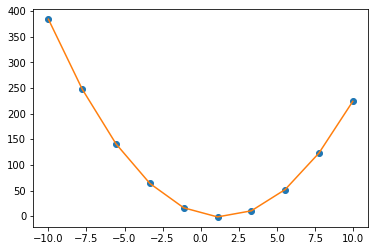

In [ ]:
plt.plot(x1,y,'o')
plt.plot(x1, np.sum( x * regr.coef_ , axis = 1 ) + regr.intercept_ )
plt.show()


### <font color = 'red'> 연습 : 일반 2차항 회귀분석

이제 직접 아래의 데이터를 회귀분석 해보자. 
</font>

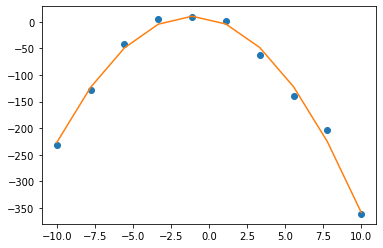

[[-299.46014489   65.66765455]
 [-181.15490246   51.07484242]
 [ -92.42597064   36.4820303 ]
 [ -33.27334943   21.88921818]
 [  -3.69703883    7.29640606]
 [  -3.69703883   -7.29640606]
 [ -33.27334943  -21.88921818]
 [ -92.42597064  -36.4820303 ]
 [-181.15490246  -51.07484242]
 [-299.46014489  -65.66765455]]
[-233.79249034 -130.08006004  -55.94394034  -11.38413125    3.59936723
  -10.99344489  -55.16256761 -128.90800095 -232.22974489 -365.12779943]


In [ ]:
x = np.linspace(-10,10,10) 
y = np.array([-231.147, -127.567,  -40.952,    6.153,    8.834,    1.256,
        -62.83 , -140.27 , -202.641, -361.278])
plt.plot(x,y,'o')
#plt.show() 
# 위의 2차 함수 x,y 를 다항회귀분석 하고 그래프를 그리세요
x1 = x
x2 = x**2
x = np.c_[x2,x1]
regr.fit(x,y)
plt.plot(x1, np.sum(x*regr.coef_, axis=1) + regr.intercept_) #가로축으로 합산 
plt.show()
#print(x*regr.coef_)
#print(np.sum(x*regr.coef_, axis=1))


## N 차항 회귀분석

이번엔 3차 함수 곡선을 회귀분석 해보도록 하자  다음은 

$ 4x^3 - 2x^2 + x $

에 오차를 추가해 생성한 데이터이다. 



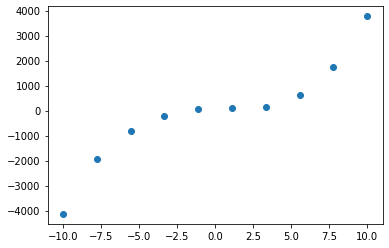

In [61]:
x = np.linspace(-10,10,10) 
y = np.array([-4132.6566903 , -1941.82425372,  -828.91386335,  -222.81613786,
          62.4714198 ,   101.95907133,   154.61946937,   622.49421759,
        1751.0369058 ,  3776.1515029 ])

plt.plot(x,y,'o')
plt.show() 
# 4*x**3 - 2 * x**2 + x

이 문제를 풀기위에 다항 회귀를 3차항까지 확장해보자. 

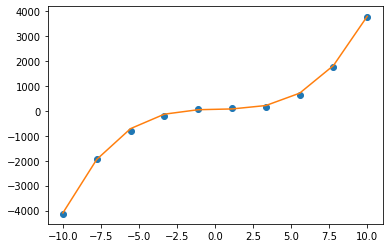

score: 0.9994512586638173


In [62]:
x3 = x ** 3 #3승 용 변수
x2 = x ** 2
x1 = x 

xa = np.c_[x3,x2,x1]
regr.fit(xa,y)

plt.plot(x,y,'o')
plt.plot(x, np.sum(xa * regr.coef_ + regr.intercept_ , axis = 1))
plt.show()

print("score:", regr.score(xa,y))

###  n 차항 x 를 만드는 함수 만들기

In [63]:
def polyMat(x, n): 
  xa = x.reshape(-1,1)
  for i in range(2,n+1):
    xa = np.c_[xa, x.reshape(-1,1) ** i]
  return xa

polyMat(np.array([1,2,3]), 5 )
'''
array([[  1,   1,   1,   1,   1],
       [  2,   4,   8,  16,  32],
       [  3,   9,  27,  81, 243]])
              **2  **3  **4  **5
'''

array([[  1,   1,   1,   1,   1],
       [  2,   4,   8,  16,  32],
       [  3,   9,  27,  81, 243]])

[1 4 9]


### sin 함수 다항회귀분석

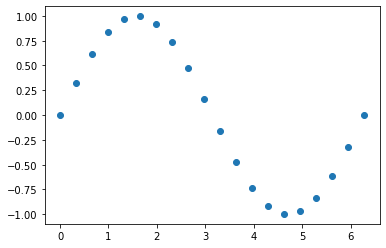

In [66]:
x = np.linspace(0, np.pi * 2 , 20)
y = np.sin(x)
plt.plot(x, y, 'o')
plt.show()

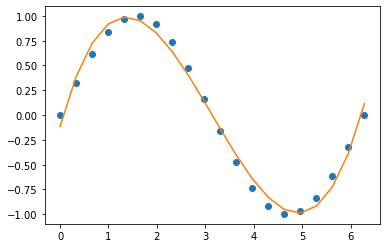

score: 0.9873108766035608


In [67]:
xa = polyMat(x,4) # 2,3,4
regr.fit(xa,y)

plt.plot(x,y,'o')
plt.plot(x, np.sum( xa * regr.coef_ , axis = 1) + regr.intercept_ )
plt.show()

print("score:", regr.score(xa,y))

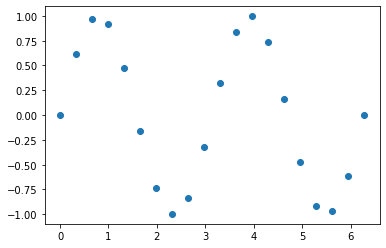

In [69]:
x = np.linspace(0, np.pi * 2 , 20) #pi*4 40
y = np.sin(x*2) #x,x*2 x의 반형비율커짐, 4로하면 4주기
#pi *10 , 400
#(x) *100 + x**2
plt.plot(x, y, 'o')
plt.show()

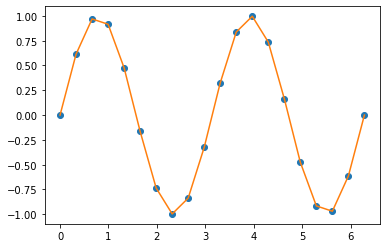

score: 0.9999999999933785


In [77]:
xa = polyMat(x,7)#7
regr.fit(xa,y)

plt.plot(x,y,'o')
plt.plot(x, np.sum( xa * regr.coef_ , axis = 1) + regr.intercept_ )
plt.show()

print("score:", regr.score(xa,y))

### <font color = 'red'> 연습 : cos 함수 회귀분석 

다음 x 가 $4\pi$ 까지 범위의cos 함수를 그리고 0.99 이상의 정확도가 나오는 모델을 찾으세요
</font>

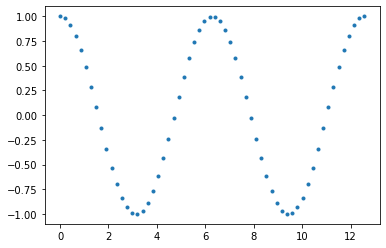

In [78]:
x = np.linspace(0, np.pi * 4 , 60) #pi*4 40
y = np.cos(x)
plt.plot(x,y,'.')

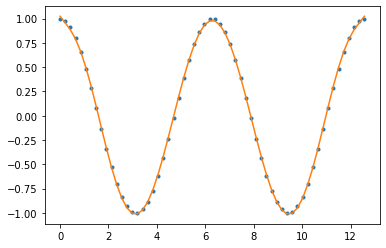

score :  0.9995880760668908


In [86]:
#x = np.linspace(0, np.pi * 4 , 60) #pi*4 40
#y = np.cos(x)
#plt.plot(x,y,'.')

xa = polyMat(x,8)
regr.fit(xa,y) #구하고자하는형태(상관계수)구해줌 / x,y를 맞춰줌, but 같은 shape 이어야함 (reshape)
regr.score(xa,y)

plt.plot(x,y,'.')
plt.plot(x,np.sum(xa*regr.coef_,axis=1) + regr.intercept_) 
#coef 상관계수
#axis 는 축 
#intercept는 상수,자동으로 미분해주고 상수계수 구해주는 라이브러리 
plt.show()

print("score : ",regr.score(xa,y))
#plt.plot(xa,y)


#x.reshape(-1,1),y

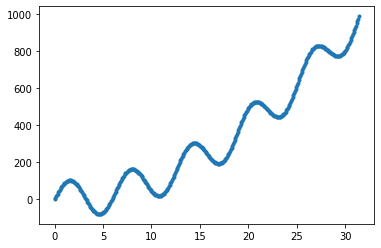

In [87]:
x = np.linspace(0, np.pi * 10 , 400) #pi*4 40
y = np.sin(x) * 100 + x**2
plt.plot(x,y,'.')

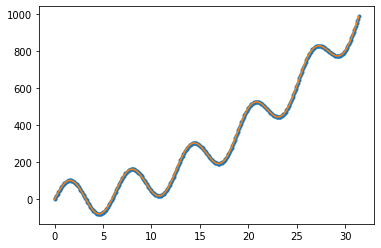

In [88]:
xa = polyMat(x,5)
xa = np.c_[xa,np.sin(x).reshape(-1,1)]
regr.fit(xa,y)
regr.score(xa,y)

plt.plot(x,y,'.')
plt.plot(x,np.sum(xa*regr.coef_,axis=1) + regr.intercept_) 

plt.show()

In [ ]:
#설명 
#print(xa)
#print(regr.coef_)
#print(xa*regr.coef_)#6열 종대 곱하기 6개씩값이 나오는
print(np.sum(xa*regr.coef_,axis=1)) #1번가로축 0번세로축 총 데이터 60개
print(np.sum(xa*regr.coef_,axis=1)).shape)
#plt.plot(x,y,'o')
#plt.plot(x,np.sum(xa*regr.coef_,axis=1)+regr.coef_)
#plt.show()

(400,)
